[[-16.12787607   2.16506561   3.11217404  -0.27256081   6.7926294 ]
 [-15.28552894   1.40043807  -0.71440215   2.81351117   4.25911629]
 [-15.12633427   2.48680665  -1.78931877   3.71775918   4.17437916]
 ...
 [ 14.32508814 -12.27155514   4.05331563   3.84988676  -2.84911062]
 [ 12.86769766 -14.08181347   2.94205571   5.01354783  -3.92943249]
 [ 13.00780202 -12.25473105   1.36320561   4.21532684  -1.82269004]]


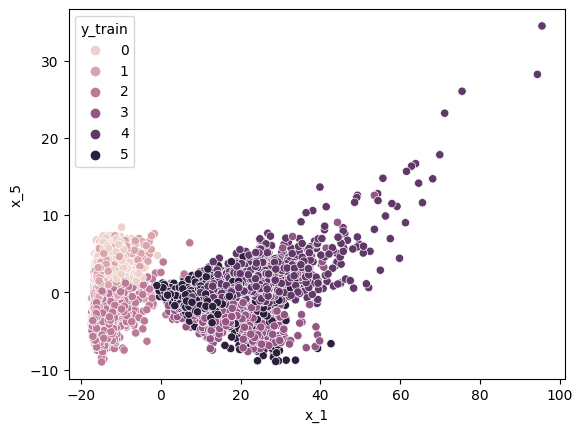

0.7607453754080522
[0.37626866 0.11179154 0.07097604 0.22693655 0.21402721]
x_1    0.376269
x_4    0.226937
x_5    0.214027
x_2    0.111792
x_3    0.070976
dtype: float64


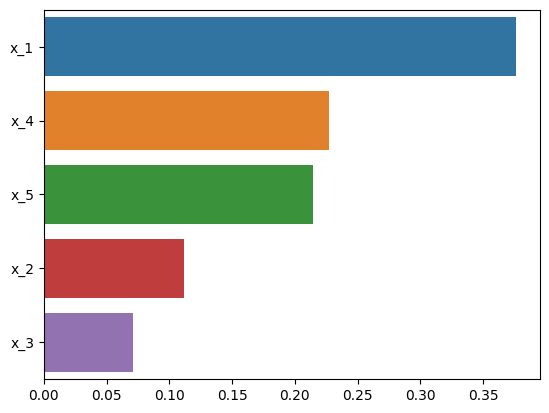

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# 주성분 분석 (PCA with Iris dataset)
df = pd.read_csv("train.csv")

# y값 인코딩
df['Activity'] = df['Activity'].map({
    'STANDING': 0,
    'SITTING': 1,
    'LAYING': 2,
    'WALKING': 3,
    'WALKING_DOWNSTAIRS': 4,
    'WALKING_UPSTAIRS': 5,
})

# x, y 분리
x_train = df.drop(['Activity'], axis=1)
y_train = df['Activity']

# 표준정규화
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
y_train = y_train.values

# 차원 축소
pca = PCA(n_components=5)
x_train = pca.fit_transform(x_train)
print(x_train)

# Visualize
df = pd.DataFrame(x_train, columns=["x_1", "x_2", "x_3", "x_4", "x_5"])
df["y_train"] = y_train

sns.scatterplot(data=df, x="x_1", y="x_5", hue="y_train")
plt.show()

# 분류 작업 Random Forest
df_x = df[["x_1", "x_2", "x_3", "x_4", "x_5"]]
df_y = df['y_train']

clf = RandomForestClassifier(n_estimators=30, max_depth=3)
clf.fit(df_x, df_y)
print(clf.score(df_x, df_y))
print(clf.feature_importances_)

sr = pd.Series(clf.feature_importances_, index=df_x.columns.values)
sr = sr.sort_values(ascending=False)
print(sr)

sns.barplot(x=sr, y=sr.index)
plt.show()